In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
best1 = pd.read_csv('submission_lightgbm.csv')
best2 = pd.read_csv('submission_best_mean.csv')

In [5]:
path_prefix = './cs5228-2310-final-project/'
df_train = pd.read_csv(path_prefix + 'train.csv')
df_test = pd.read_csv(path_prefix + 'test.csv')

In [6]:
best1

,Id,Predicted
0,0,3205.485957
1,1,2709.838681
2,2,3406.241056
3,3,2106.576645
4,4,2614.368473
...,...,...
29995,29995,2821.703540
29996,29996,2803.102328
29997,29997,2731.969793
29998,29998,3258.181790


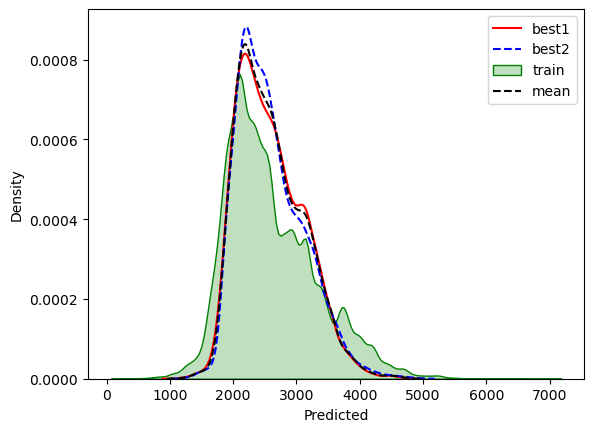

In [11]:
sns.kdeplot(best1['Predicted'], label='best1', color='red', linestyle='-')
sns.kdeplot(best2['Predicted'], label='best2', color='blue', linestyle='--')
sns.kdeplot(df_train['monthly_rent'], label='train', color='green', fill=True)
k = 0.7
mean_k = best1['Predicted'] * k + best2['Predicted'] * (1 - k)
sns.kdeplot(mean_k, label='mean', color='black', linestyle='--')
plt.legend()

In [10]:
best_mean_k = best1.copy()
best_mean_k['Predicted'] = mean_k
best_mean_k.to_csv('submission_best_mean_k.csv', index=False)

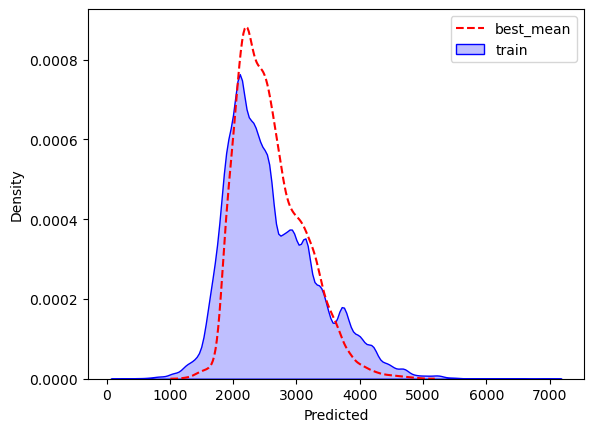

In [ ]:
best_mean = best1.copy()
best_mean['Predicted'] = (best1['Predicted'] + best2['Predicted']) / 2

sns.kdeplot(best_mean['Predicted'], label='best_mean', color='red', linestyle='--')
sns.kdeplot(df_train['monthly_rent'], label='train', color='blue', fill=True)
plt.legend()

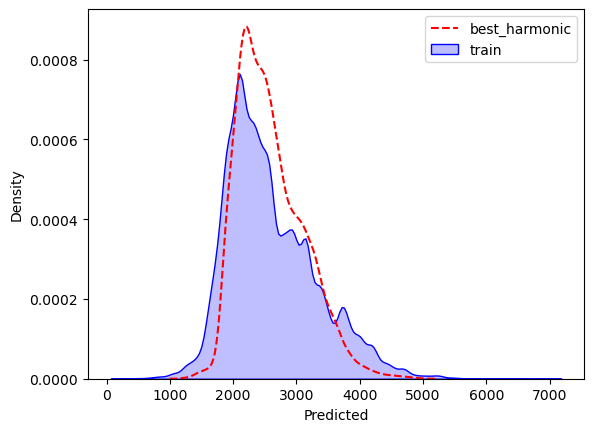

In [ ]:
best_harmonic = best1.copy()
best_harmonic['Predicted'] = 2 / (1/best1['Predicted'] + 1/best2['Predicted'])

sns.kdeplot(best_harmonic['Predicted'], label='best_harmonic', color='red', linestyle='--')
sns.kdeplot(df_train['monthly_rent'], label='train', color='blue', fill=True)
plt.legend()

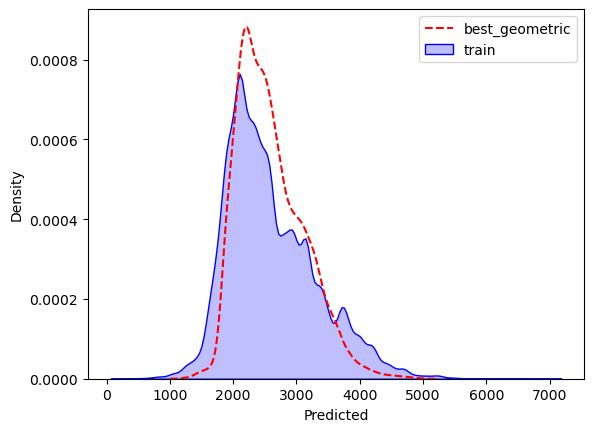

In [ ]:
best_geometric = best1.copy()
best_geometric['Predicted'] = (best1['Predicted'] * best2['Predicted']) ** 0.5

sns.kdeplot(best_geometric['Predicted'], label='best_geometric', color='red', linestyle='--')
sns.kdeplot(df_train['monthly_rent'], label='train', color='blue', fill=True)
plt.legend()

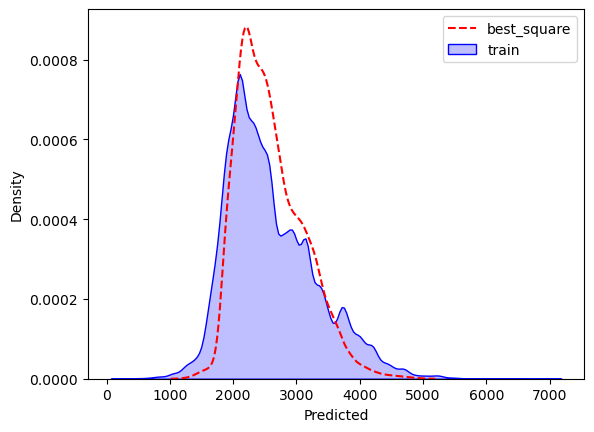

In [ ]:
best_square = best1.copy()
best_square['Predicted'] = ((best1['Predicted'] ** 2 + best2['Predicted'] ** 2) / 2) ** 0.5

sns.kdeplot(best_square['Predicted'], label='best_square', color='red', linestyle='--')
sns.kdeplot(df_train['monthly_rent'], label='train', color='blue', fill=True)
plt.legend()

<Axes: xlabel='Predicted', ylabel='Density'>

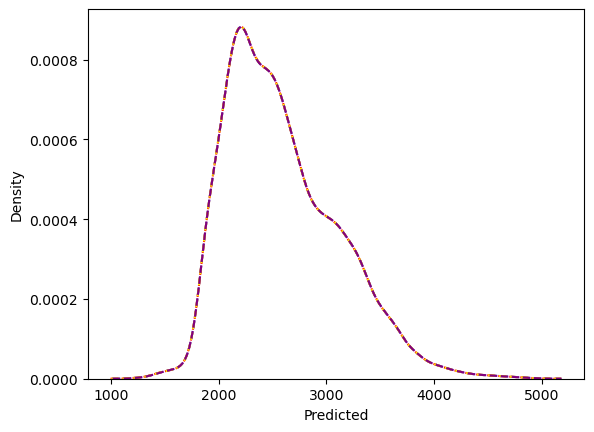

In [ ]:
sns.kdeplot(best_mean['Predicted'], label='best_mean', color='blue', linestyle='--')
sns.kdeplot(best_harmonic['Predicted'], label='best_harmonic', color='red', linestyle='--')
sns.kdeplot(best_geometric['Predicted'], label='best_geometric', color='yellow', linestyle='--')
sns.kdeplot(best_square['Predicted'], label='best_square', color='purple', linestyle='--')

<Axes: xlabel='monthly_rent', ylabel='Density'>

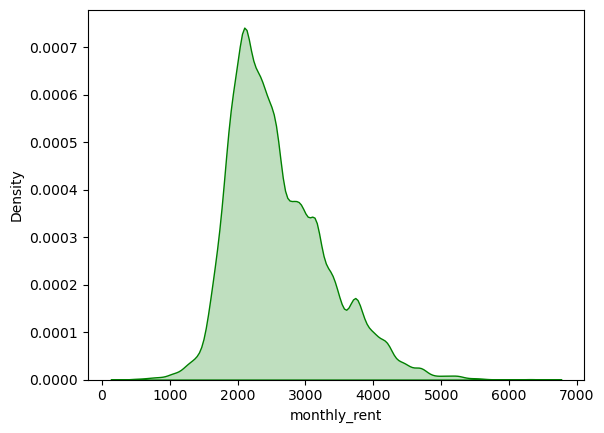

In [ ]:
sample = df_train['monthly_rent'].sample(30000, random_state=1926)
sns.kdeplot(sample, label='train', color='green', fill=True)

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred = best2['Predicted']
y_true = sample

y_pred = sorted(y_pred)
y_true = sorted(y_true)

print(mean_squared_error(y_true, y_pred, squared=False))

191.64727438717784


In [ ]:
best_mean.to_csv('submission_best_mean.csv', index=False)
best_harmonic.to_csv('submission_best_harmonic.csv', index=False)
best_geometric.to_csv('submission_best_geometric.csv', index=False)
best_square.to_csv('submission_best_square.csv', index=False)